### DATA COLLECTION

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [103]:
ipl = pd.read_csv("matches.csv")
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### Data Preprocessing

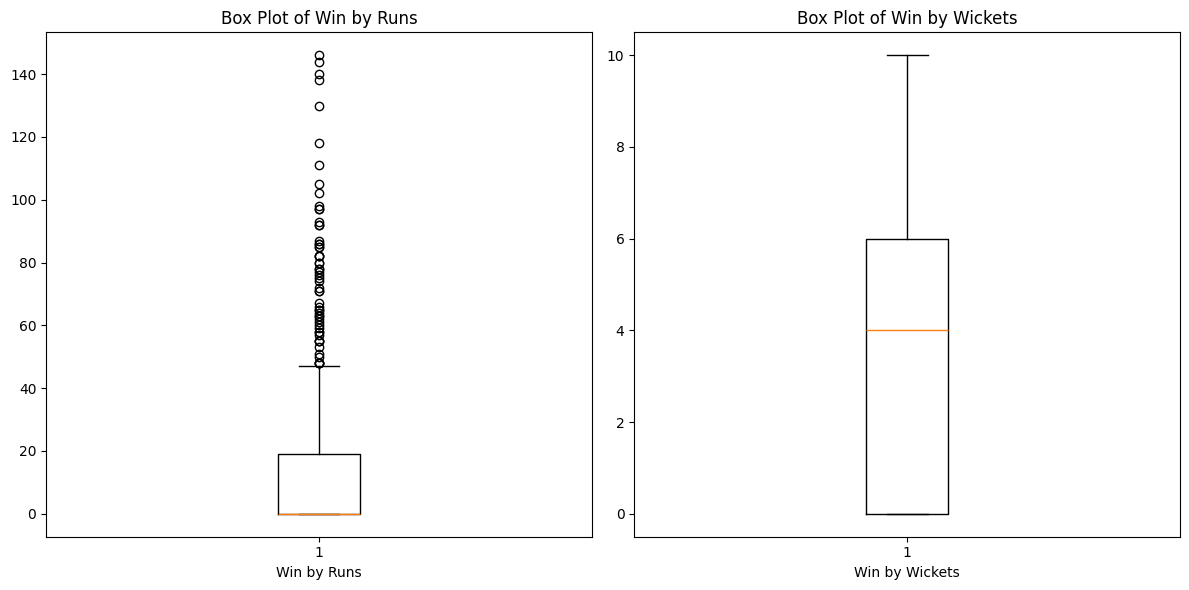

In [104]:
# Outlier Removal
# Box plot for 'Win by runs'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(ipl['win_by_runs'].dropna())
plt.title('Box Plot of Win by Runs')
plt.xlabel('Win by Runs')

# Box plot for 'Win by wickets'
plt.subplot(1, 2, 2)
plt.boxplot(ipl['win_by_wickets'].dropna())
plt.title('Box Plot of Win by Wickets')
plt.xlabel('Win by Wickets')
plt.tight_layout()
plt.show()

In [105]:
# Calculation of IQR, lower bound, upper bound, detection, and removal of outliers
q1 = ipl["win_by_runs"].quantile(0.25)
q1

0.0

In [106]:
q3 = ipl["win_by_runs"].quantile(0.75)
q3

19.0

In [107]:
iqr = q3 - q1
iqr

19.0

In [108]:
lower_bound = q1 - 1.5 * iqr
lower_bound

-28.5

In [109]:
upper_bound = q3 + 1.5 * iqr
upper_bound

47.5

In [110]:
outliers_iqr = ipl[(ipl["win_by_runs"] < lower_bound) | (ipl["win_by_runs"] > upper_bound)]
outliers_iqr

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
26,27,IPL-2017,Kolkata,23-04-2017,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
32,33,IPL-2017,Pune,29-04-2017,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,61,0,LH Ferguson,Maharashtra Cricket Association Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
35,36,IPL-2017,Hyderabad,30-04-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi,NaN
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
68,69,IPL-2008,Chandigarh,25-04-2008,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
100,101,IPL-2008,Jaipur,17-05-2008,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rajasthan Royals,65,0,GC Smith,Sawai Mansingh Stadium,BF Bowden,SL Shastri,NaN
114,115,IPL-2008,Mumbai,30-05-2008,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN


In [111]:
cleaned_ipl = ipl[~ipl["win_by_runs"].isin(outliers_iqr["win_by_runs"])]
cleaned_ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [112]:
print("Outliers Detected Using IQR Method: ", len(outliers_iqr))

Outliers Detected Using IQR Method:  58


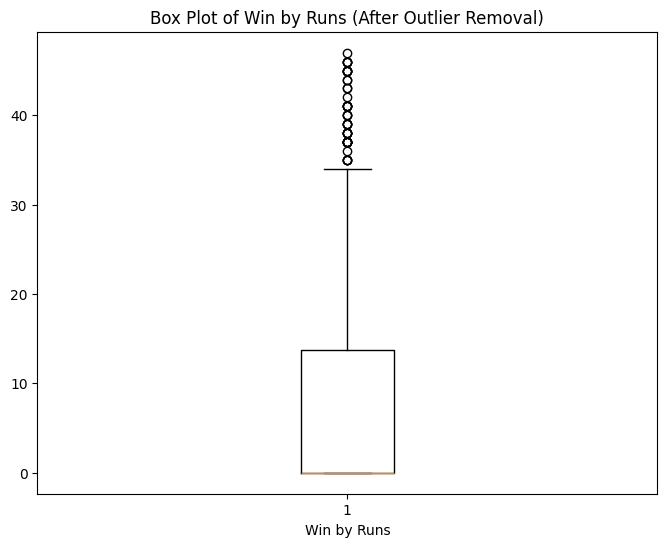

In [113]:
# Box plot after outlier removal
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_ipl['win_by_runs'].dropna())
plt.title('Box Plot of Win by Runs (After Outlier Removal)')
plt.xlabel('Win by Runs')
plt.show()


In [114]:
# Calculate skewness for numerical columns
skewness = ipl[['win_by_runs', 'win_by_wickets']].skew()
print("Skewness:")
print(skewness)

Skewness:
win_by_runs       2.551532
win_by_wickets    0.270236
dtype: float64


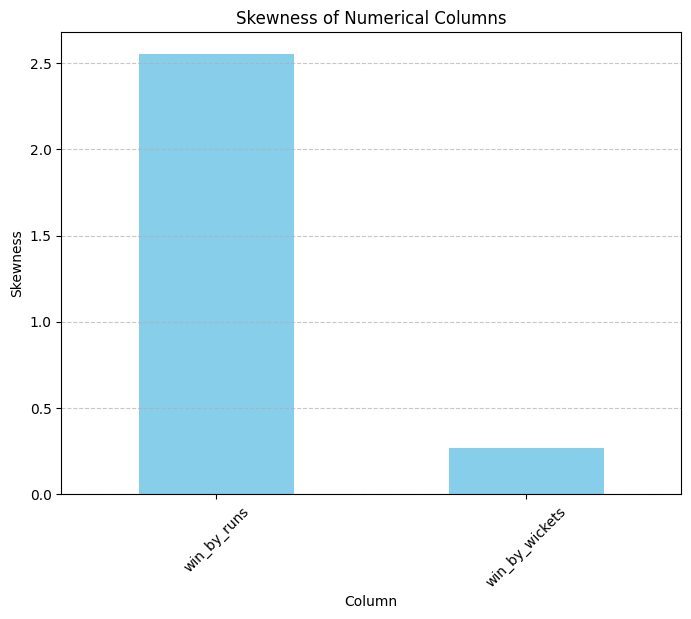

In [115]:
# Plot skewness values
plt.figure(figsize=(8, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The graph shows that the distribution of matches won by runs is highly skewed to the right, whereas the distribution of matches won by wickets is more symmetrical. This indicate that it is more comman for teams to win by a balanced number of wickets,but less common to win by a large number of runs. 

 ### Exploratory Data Analysis (EDA)

In [116]:
# Summary statistics
print(cleaned_ipl.drop(columns=['id']).describe())

       dl_applied  win_by_runs  win_by_wickets
count  698.000000   698.000000      698.000000
mean     0.025788     7.812321        3.628940
std      0.158616    12.405650        3.379594
min      0.000000     0.000000        0.000000
25%      0.000000     0.000000        0.000000
50%      0.000000     0.000000        4.000000
75%      0.000000    13.750000        7.000000
max      1.000000    47.000000       10.000000


In [117]:
# Info
print(cleaned_ipl.info())

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               698 non-null    int64 
 1   Season           698 non-null    object
 2   city             691 non-null    object
 3   date             698 non-null    object
 4   team1            698 non-null    object
 5   team2            698 non-null    object
 6   toss_winner      698 non-null    object
 7   toss_decision    698 non-null    object
 8   result           698 non-null    object
 9   dl_applied       698 non-null    int64 
 10  winner           694 non-null    object
 11  win_by_runs      698 non-null    int64 
 12  win_by_wickets   698 non-null    int64 
 13  player_of_match  694 non-null    object
 14  venue            698 non-null    object
 15  umpire1          696 non-null    object
 16  umpire2          696 non-null    object
 17  umpire3          113 non-null    object


In [118]:
# Define columns for which to fill missing values
columns_to_fill = cleaned_ipl.columns

# Fill missing values in each column with mean, median, or mode
for column in columns_to_fill:
    if cleaned_ipl[column].dtype == 'object':
        # For categorical columns, fill with mode
        cleaned_ipl[column].fillna(cleaned_ipl[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with mean or median
        if cleaned_ipl[column].isnull().any():
            if cleaned_ipl[column].dtype == 'int64' or cleaned_ipl[column].dtype == 'float64':
                # Fill with mean
                cleaned_ipl[column].fillna(cleaned_ipl[column].mean(), inplace=True)
            elif cleaned_ipl[column].dtype == 'datetime64[ns]':
                # Fill with median for datetime columns
                cleaned_ipl[column].fillna(cleaned_ipl[column].median(), inplace=True)

# Print the DataFrame to verify that missing values have been filled
print(cleaned_ipl.head())


   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [119]:
print(cleaned_ipl.info())

<class 'pandas.core.frame.DataFrame'>
Index: 698 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               698 non-null    int64 
 1   Season           698 non-null    object
 2   city             698 non-null    object
 3   date             698 non-null    object
 4   team1            698 non-null    object
 5   team2            698 non-null    object
 6   toss_winner      698 non-null    object
 7   toss_decision    698 non-null    object
 8   result           698 non-null    object
 9   dl_applied       698 non-null    int64 
 10  winner           698 non-null    object
 11  win_by_runs      698 non-null    int64 
 12  win_by_wickets   698 non-null    int64 
 13  player_of_match  698 non-null    object
 14  venue            698 non-null    object
 15  umpire1          698 non-null    object
 16  umpire2          698 non-null    object
 17  umpire3          698 non-null    object


In [120]:
# Unique Values
print("City:", cleaned_ipl["city"].unique())

City: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town' 'Durban'
 'Port Elizabeth' 'Centurion' 'East London' 'Johannesburg' 'Kimberley'
 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala' 'Kochi'
 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']


In [121]:
print("Team 1:", cleaned_ipl["team1"].unique())

Team 1: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [122]:
print("Team 2:", cleaned_ipl["team2"].unique())

Team 2: ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


In [123]:
print("Winner:", cleaned_ipl["winner"].unique())

Winner: ['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Gujarat Lions' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


In [124]:
#Finding which team won by maximum number of wickets
cleaned_ipl.iloc[cleaned_ipl['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

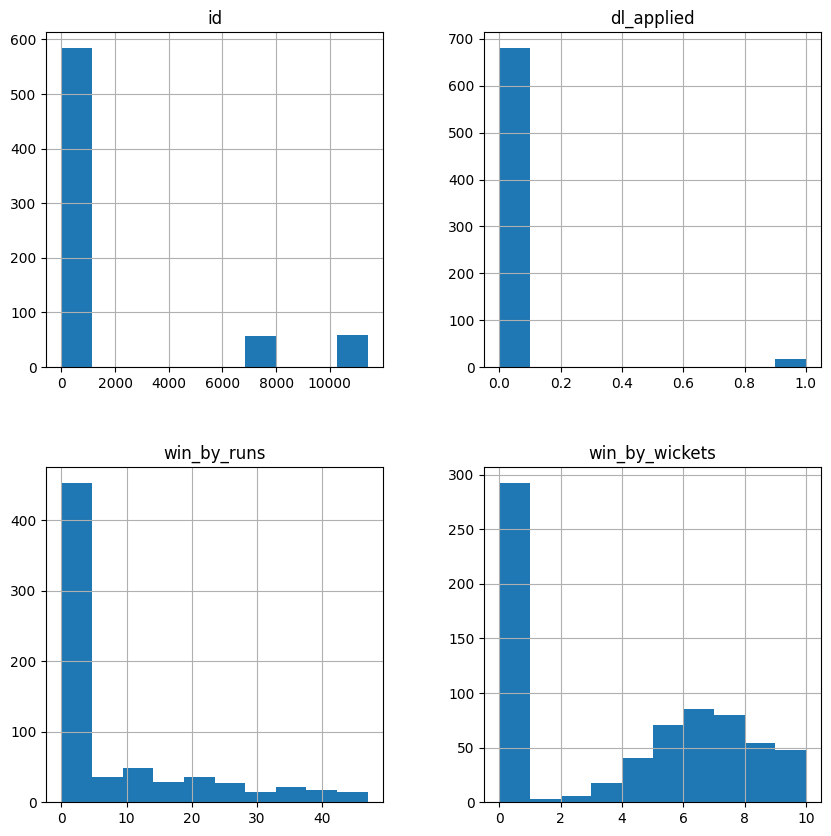

In [125]:
#distribution of feature of summary data
cleaned_ipl.hist(figsize = (10,10))
plt.show()

Text(0.5, 1.0, 'Distribution of Win by Runs')

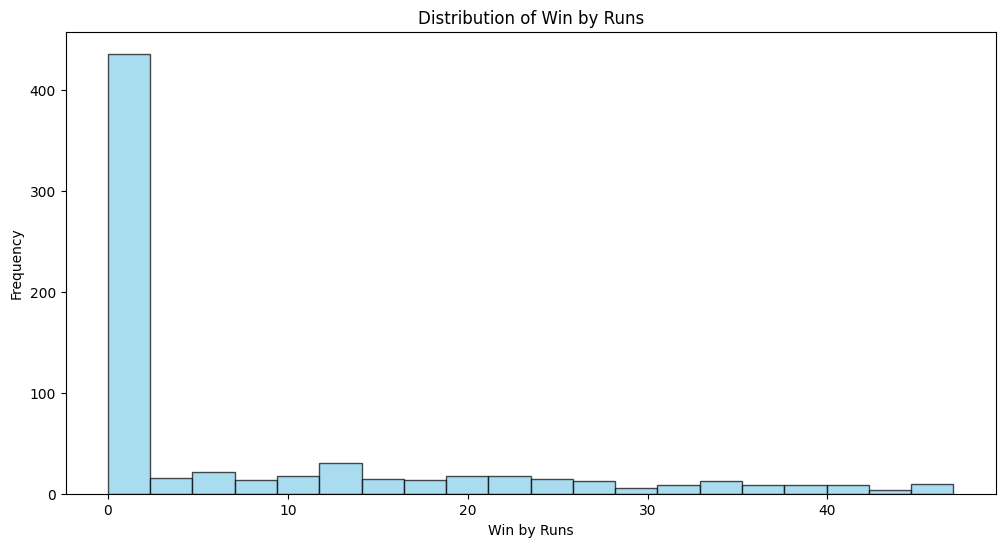

In [126]:
# Distribution of Variables
plt.figure(figsize=(12, 6))

# Plot histogram for "win_by_runs"
plt.hist(cleaned_ipl["win_by_runs"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Win by Runs')

Text(0.5, 1.0, 'Distribution of Win by Wickets')

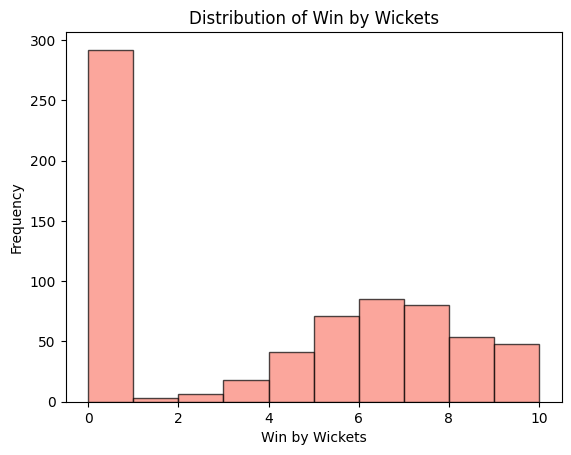

In [127]:
# Plot histogram for "win_by_wickets"
plt.hist(cleaned_ipl["win_by_wickets"], bins=10, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.title('Distribution of Win by Wickets')

In [128]:
# Correlation Analysis
correlation =cleaned_ipl[['win_by_runs','win_by_wickets']].corr()
print(correlation)

                win_by_runs  win_by_wickets
win_by_runs        1.000000       -0.677171
win_by_wickets    -0.677171        1.000000


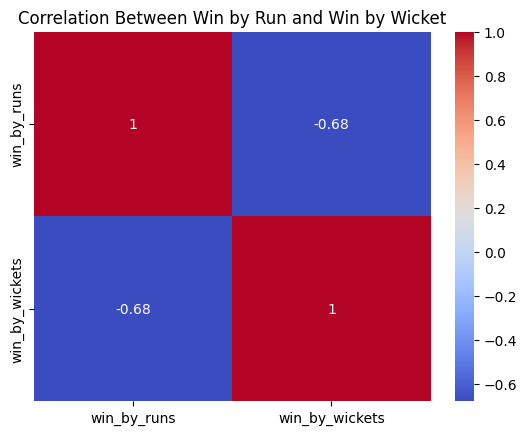

In [129]:
#Plotting heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Win by Run and Win by Wicket')
plt.show()

#### This heatmap shows that winning by runs and winning by wickets are inversely related; as the number of matches won by runs increases, the number of matches won by wickets tends to decrease, and vice versa, with a correlation of -0.68 between them.

<Axes: xlabel='count', ylabel='winner'>

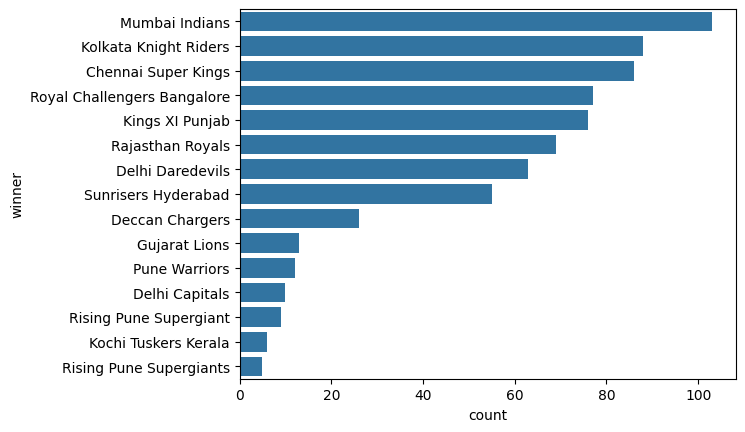

In [130]:
#which team won maximum number of times
win=cleaned_ipl.winner.value_counts()
sns.barplot(y=win.index,x=win)

![](mumbai-indians-logo-poster-svsv7oaixjw5pc6o.jpg)




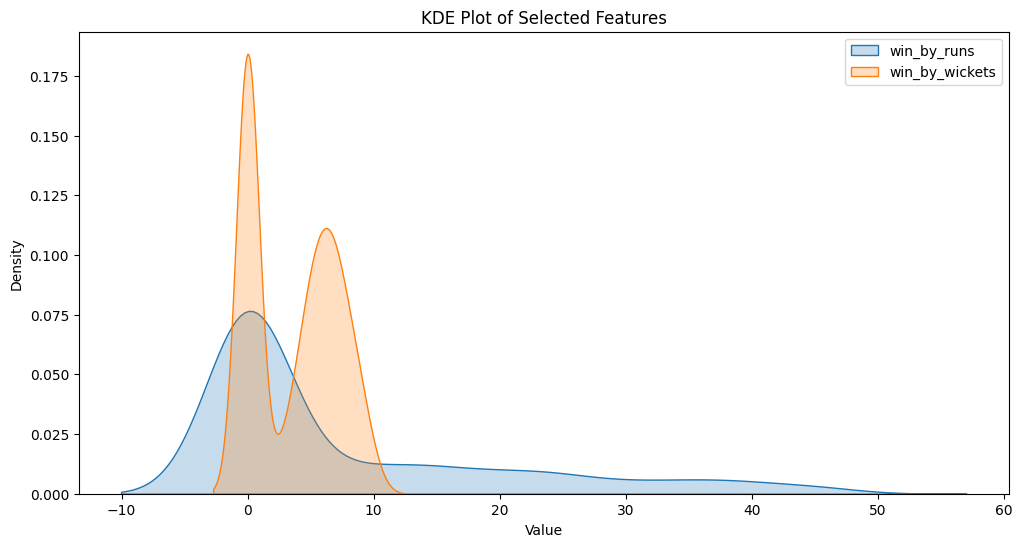

In [131]:
#KDE
# List of columns for which to plot KDE
columns_to_plot = ['win_by_runs', 'win_by_wickets']  

# Plot KDE for each column
plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    sns.kdeplot(cleaned_ipl[column], shade=True, label=column)

# Add title and labels
plt.title('KDE Plot of Selected Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [132]:
#Finding the higher wins by teams per season
cleaned_ipl.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               11
          Chennai Super Kings             9
          Kings XI Punjab                 9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
          Sunrisers Hyderabad             5
Name: count, Length: 100, dtype: int64

In [133]:
#Finding the frequency of the toss decision
cleaned_ipl['toss_decision'].value_counts()

toss_decision
field    427
bat      271
Name: count, dtype: int64

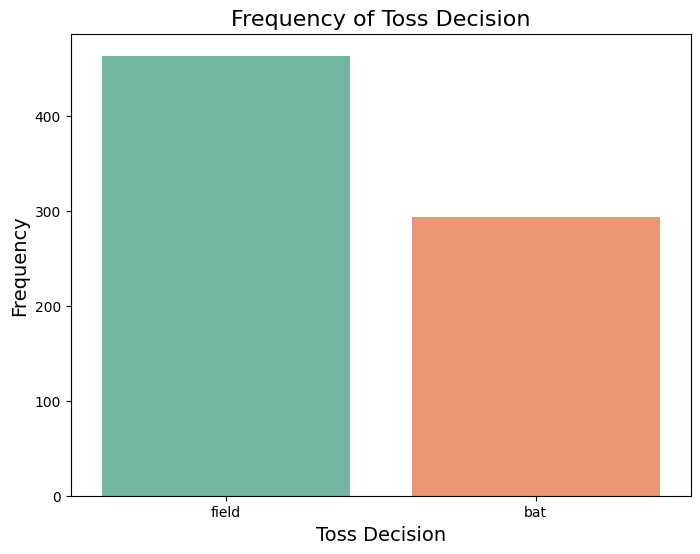

In [134]:
# Plotting the frequency of the toss decision
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=ipl, palette='Set2')

# Adding labels and title
plt.title('Frequency of Toss Decision', fontsize=16)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

In [136]:
#Finding the man of the match
cleaned_ipl['player_of_match'].value_counts()

player_of_match
AB de Villiers    22
CH Gayle          18
RG Sharma         17
YK Pathan         16
DA Warner         16
                  ..
MJ Lumb            1
PD Collingwood     1
NV Ojha            1
AC Voges           1
S Hetmyer          1
Name: count, Length: 221, dtype: int64

##### AB de Villiers Won the Man of the Match Award Most Times

In [137]:
#Getting the frequency of result column
cleaned_ipl['result'].value_counts()

result
normal       685
tie            9
no result      4
Name: count, dtype: int64

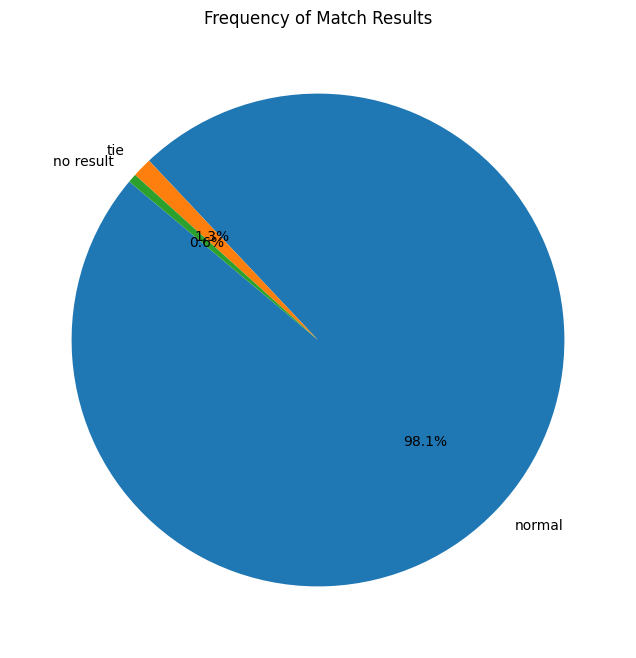

In [146]:
result_counts = cleaned_ipl['result'].value_counts()

# Plot the pie plot
plt.figure(figsize=(10, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Match Results')
plt.show()

##### The Chart effectively communicates that most IPL matches concluded with a definitive result,with very few matches ending in a tie or with no result. This shows a high level competitiveness and efficient management in the IPL 

In [147]:
#Finding the number of tosses won by each team
cleaned_ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 89
Kolkata Knight Riders          88
Chennai Super Kings            81
Kings XI Punjab                75
Rajasthan Royals               75
Royal Challengers Bangalore    73
Delhi Daredevils               71
Sunrisers Hyderabad            44
Deccan Chargers                41
Pune Warriors                  19
Gujarat Lions                  14
Delhi Capitals                  9
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Rising Pune Supergiant          5
Name: count, dtype: int64

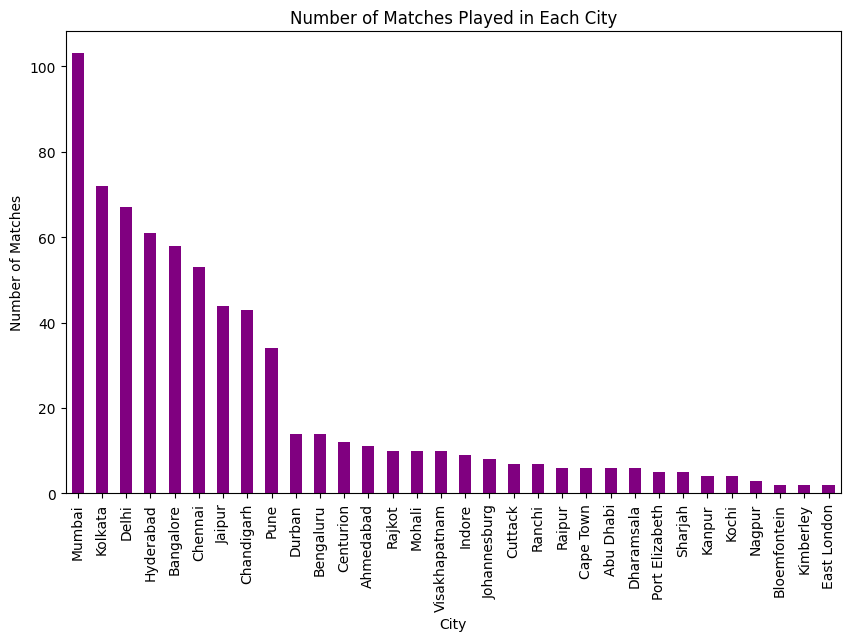

In [149]:
city_matches =cleaned_ipl['city'].value_counts()
city_matches.plot(kind='bar', figsize=(10, 6), color='purple'  ) 
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each City')
plt.show()

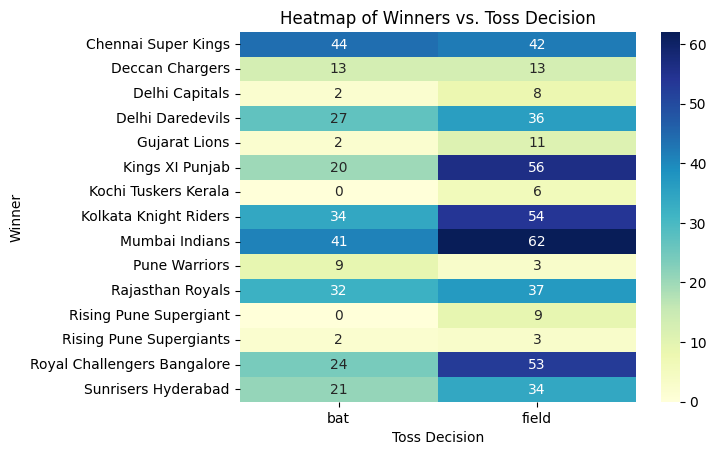

In [150]:
# Create a pivot table
pivot_table = cleaned_ipl.pivot_table(index='winner', columns='toss_decision', aggfunc='size', fill_value=0)

# Plot heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Winners vs. Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Winner')
plt.show()

###### The heatmap provides a clear visual representation of how toss decisions correlate with match outcomes for various IPL teams. It shows that many teams tend to win more matches when they choose to field after winning the toss. This insight could be useful for strategic planning in future matches.

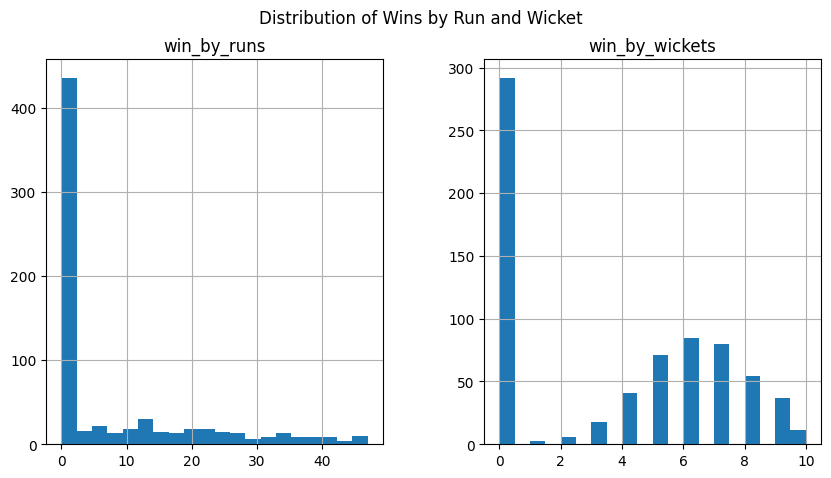

In [151]:
# Plot histograms to visualize distributions
cleaned_ipl[['win_by_runs', 'win_by_wickets']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution of Wins by Run and Wicket')
plt.show()

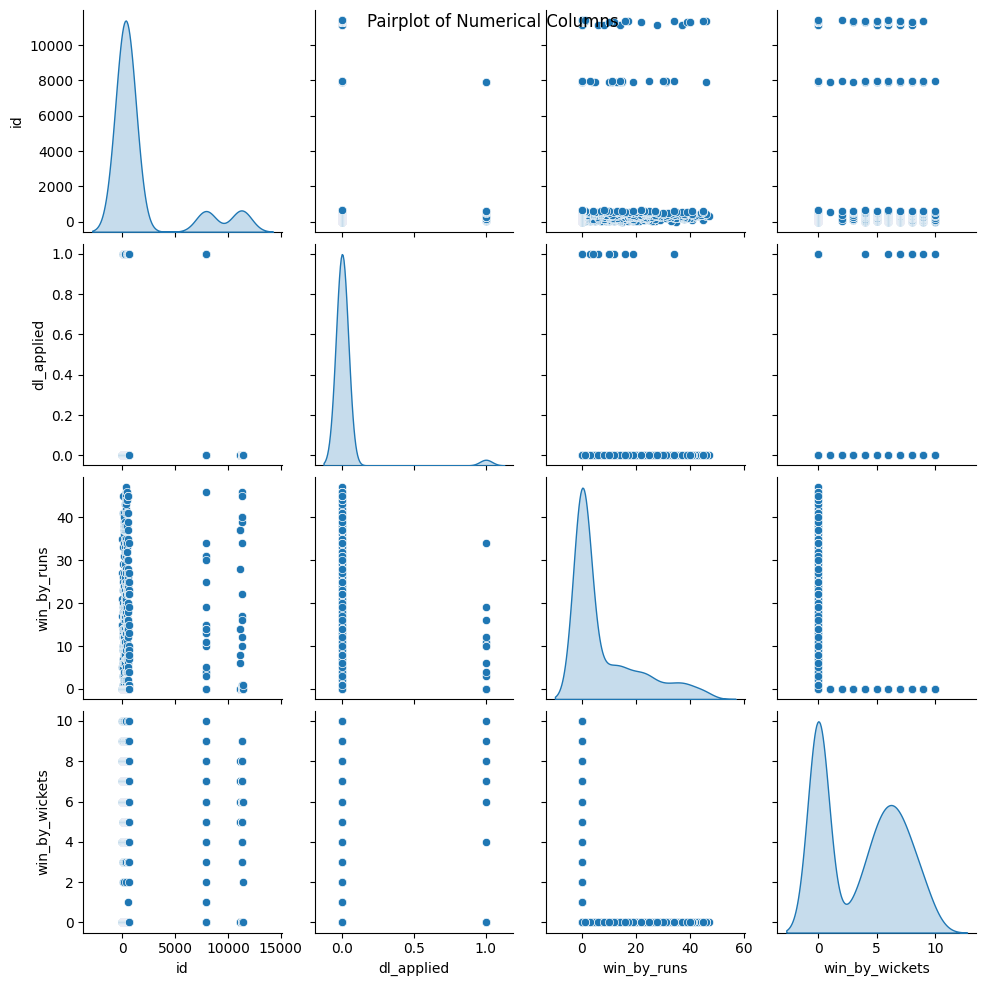

In [152]:
sns.pairplot(cleaned_ipl,diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

In [153]:
#Finding the number of matches played in each season
cleaned_ipl['Season'].value_counts()

Season
IPL-2012    71
IPL-2013    66
IPL-2011    65
IPL-2019    58
IPL-2014    57
IPL-2015    56
IPL-2016    56
IPL-2018    56
IPL-2010    55
IPL-2008    54
IPL-2017    53
IPL-2009    51
Name: count, dtype: int64

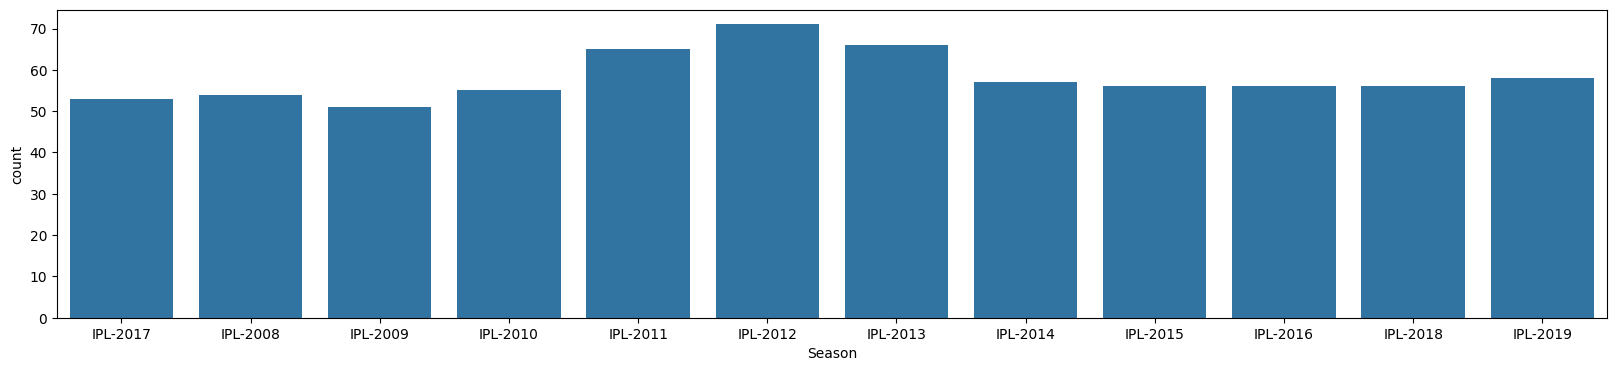

In [154]:
#Finding the season in which the highest number of matches were played
plt.figure(figsize=(20, 4))
sns.countplot(x='Season', data=cleaned_ipl)
plt.show()

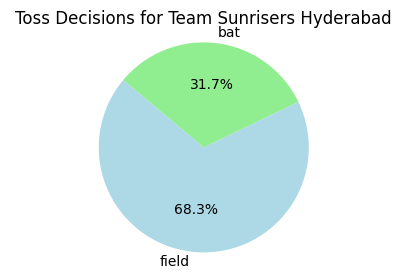

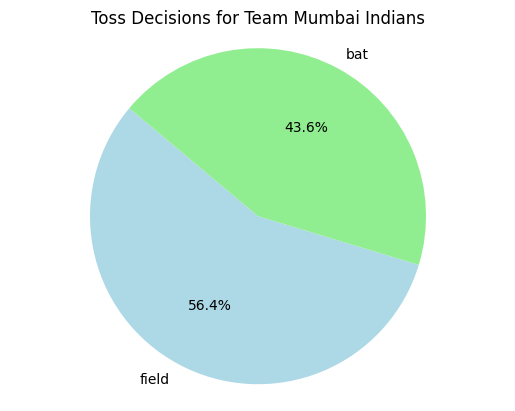

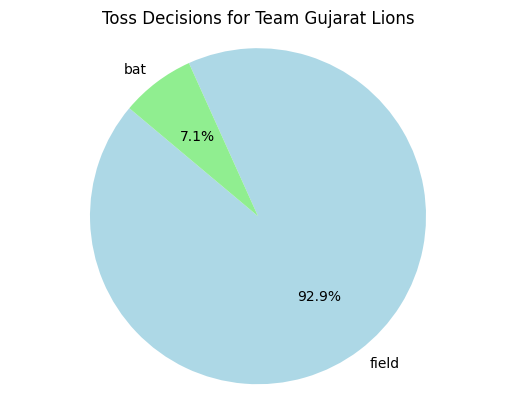

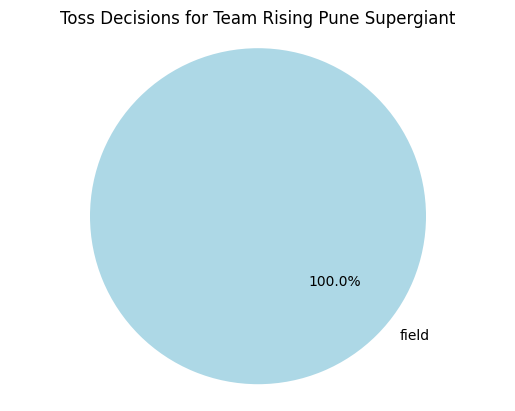

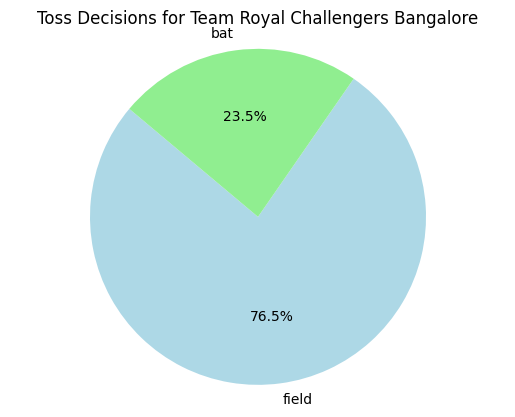

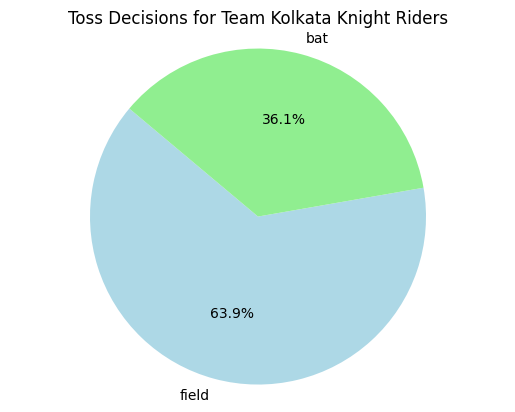

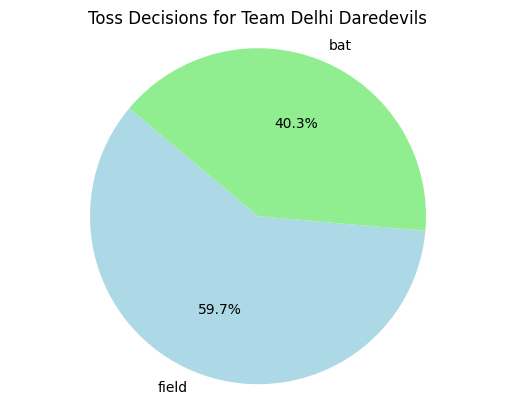

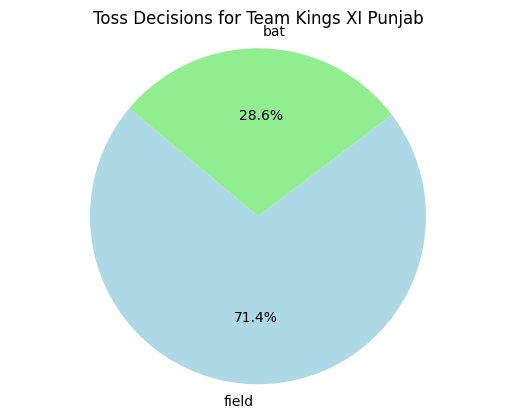

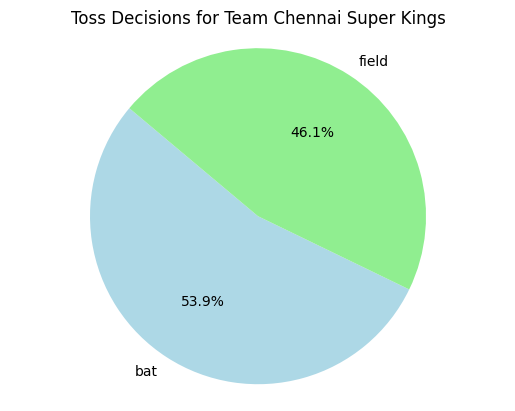

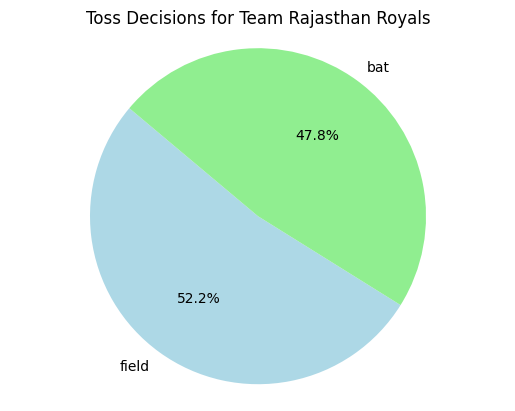

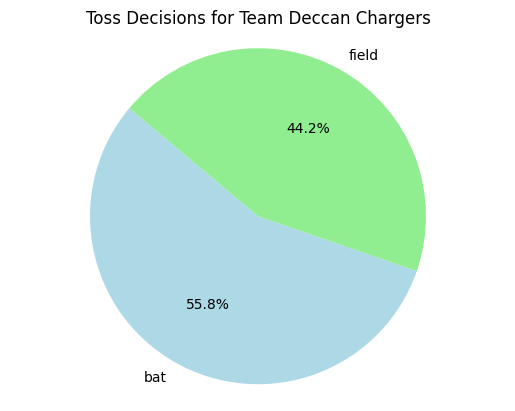

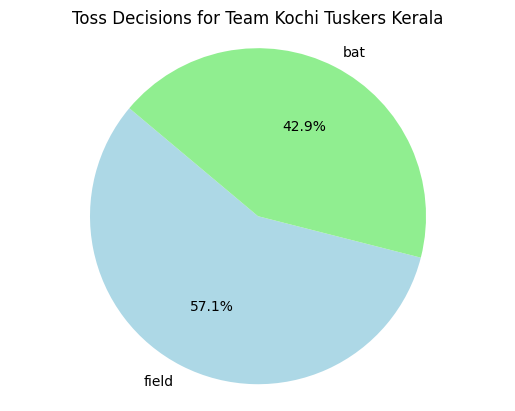

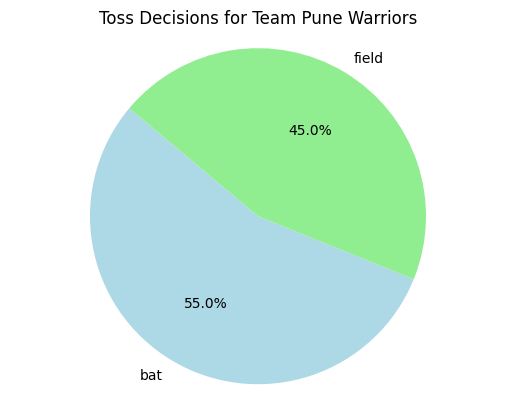

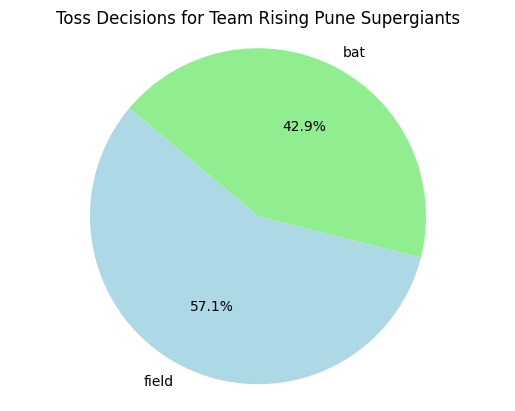

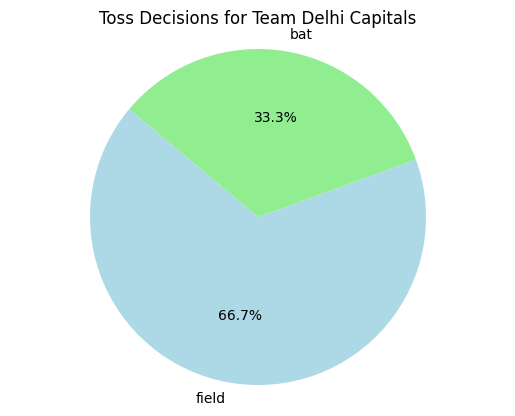

In [159]:
# Calculate the value counts of toss decisions based on the 'team1' column
toss_decision_counts_team1 = ipl.groupby("team1")["toss_decision"].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 3))
colors = ['lightblue', 'lightgreen', 'lightcoral']
for team in ipl['team1'].unique():
    labels = toss_decision_counts_team1[team].index
    sizes = toss_decision_counts_team1[team].values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f"Toss Decisions for Team {team}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

### Feature Engineering

In [163]:
# Encode categorical variables
label_encoder = LabelEncoder()
ipl_encoded =cleaned_ipl.copy()  # Make a copy of the dataframe to avoid modifying the original
categorical_columns = ['city', 'winner']  # Specify categorical columns for encoding

for col in categorical_columns:
    ipl_encoded[col] = label_encoder.fit_transform(ipl_encoded[col])

# Display the encoded DataFrame
print(cleaned_ipl.head())

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [164]:
# Regression
# Data Preparation for Regression
cleaned_ipl.drop(columns=["umpire3"], inplace=True)
cleaned_ipl.dropna(inplace=True)
cleaned_ipl["Season"] = cleaned_ipl["Season"].str.replace('IPL-', '').astype(int)
cleaned_ipl.drop(['id', 'date', 'venue', 'umpire1', 'umpire2'], axis=1, inplace=True)


In [166]:
# 1. Encode categorical variables
label_encoder = LabelEncoder()
cleaned_ipl_encoded = cleaned_ipl.copy()  # Make a copy of the dataframe to avoid modifying the original
categorical_columns = ['city', 'team1', 'team2', 'toss_winner', 'winner']  # Specify categorical columns for encoding

for col in categorical_columns:
    cleaned_ipl_encoded[col] = label_encoder.fit_transform(cleaned_ipl_encoded[col])

# 2. Handle missing values (fill with mean for numeric columns)
cleaned_ipl_encoded.fillna(cleaned_ipl_encoded.mean(), inplace=True)

# Model Training and Evaluation for Regression
X_reg = cleaned_ipl_encoded.drop('winner', axis=1)
y_reg = cleaned_ipl_encoded['winner']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)
print(f'Mean Squared Error (Linear Regression): {mse_reg}')
print(f'R-squared (Linear Regression): {r2_reg}')

TypeError: Could not convert ['fieldfieldfieldfieldbatfieldfieldbatfieldfieldfieldfieldfieldfieldfieldbatfieldfieldbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldbatfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldbatfieldfieldfieldbatfieldfieldfieldbatbatbatbatbatbatbatfieldfieldfieldbatfieldbatbatbatfieldfieldbatbatbatbatfieldbatfieldfieldfieldfieldbatfieldfieldfieldbatfieldbatbatfieldfieldfieldfieldbatfieldbatfieldfieldfieldbatfieldfieldbatfieldbatfieldbatbatfieldfieldfieldbatfieldbatbatfieldbatbatbatbatfieldbatbatbatfieldfieldbatbatbatfieldbatbatbatbatfieldbatbatfieldbatbatfieldfieldbatfieldbatbatfieldbatfieldfieldbatbatbatfieldbatfieldbatfieldfieldfieldfieldbatfieldfieldbatfieldbatfieldbatfieldbatbatbatfieldbatfieldfieldfieldbatbatfieldbatfieldbatfieldbatbatbatbatbatbatbatbatbatbatfieldbatbatfieldbatfieldfieldbatbatbatbatfieldbatfieldbatbatbatbatbatbatbatfieldbatbatbatbatbatfieldfieldbatfieldfieldfieldbatfieldfieldfieldfieldbatbatfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldbatfieldfieldbatfieldfieldfieldbatfieldfieldfieldbatfieldbatbatbatfieldbatfieldfieldbatfieldfieldfieldbatfieldbatbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatbatfieldfieldfieldbatfieldbatbatbatfieldfieldbatbatbatbatfieldfieldbatfieldbatfieldfieldbatbatbatfieldbatbatbatfieldbatbatbatfieldbatbatbatbatfieldfieldbatbatfieldfieldfieldfieldbatfieldbatbatfieldfieldbatfieldfieldfieldbatfieldbatfieldbatbatfieldbatfieldfieldfieldbatbatbatbatfieldbatfieldfieldbatbatbatfieldfieldbatfieldfieldfieldbatbatfieldbatfieldbatfieldbatbatbatbatfieldfieldfieldbatbatbatbatbatbatbatbatfieldbatbatbatfieldbatfieldbatfieldfieldfieldfieldbatfieldbatfieldfieldbatbatfieldbatbatbatbatbatfieldbatfieldfieldbatfieldfieldfieldbatbatfieldfieldbatbatfieldbatfieldbatbatfieldfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldbatbatbatfieldfieldfieldbatbatbatfieldbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldfieldbatfieldbatfieldbatbatfieldbatfieldfieldfieldfieldfieldfieldfieldbatfieldfieldbatfieldfieldfieldfieldfieldfieldbatfieldbatfieldbatfieldbatbatbatbatbatbatbatfieldfieldbatbatbatfieldbatbatfieldfieldbatfieldfieldfieldfieldbatfieldbatfieldbatfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldbatbatbatfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldbatfieldfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldbatbatbatfieldfieldfieldfieldfieldfieldfieldfieldfieldbatbatbatfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldbatfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatbatfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldfieldbatfieldfieldfieldbatfieldbatfieldfieldfieldbatfieldfieldbat'
 'normalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalno resultnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalno resultnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalno resultnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormaltienormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalnormalno resulttienormalnormalnormalnormalnormalnormalnormalnormalnormal'] to numeric